In [ ]:
import os
os.chdir(os.getcwd()[:-6])

In [28]:
from float.data import DataLoader
from float.prediction.skmultiflow import SkmultiflowClassifier
from float.prediction.evaluation import PredictionEvaluator
from float.pipeline import PrequentialPipeline
from skmultiflow.trees import HoeffdingTreeClassifier
from sklearn.metrics import zero_one_loss
from float.visualization import plot
import matplotlib.pyplot as plt

In [24]:
data_loader = DataLoader(None, f'float/data/datasets/spambase.csv', target_col=0)

predictor = SkmultiflowClassifier(HoeffdingTreeClassifier(), data_loader.stream.target_values, reset_after_drift=True)
pred_evaluator = PredictionEvaluator([zero_one_loss], decay_rate=0.1, window_size=10)

prequential_pipeline = prequential_pipeline = PrequentialPipeline(data_loader=data_loader,
                                                                  predictor=predictor,
                                                                  prediction_evaluator=pred_evaluator,
                                                                  max_n_samples=data_loader.stream.n_samples)
prequential_pipeline.run()

Pretrain predictor with 100 observation(s).
[====================] 100%
################################## SUMMARY ##################################
Evaluation finished after 6.456256628036499s
Data Set float/data/datasets/spambase.csv
Processed 4601 instances in batches of 100
----------------------
Prediction:
| Model                 |   Avg. Test Time |   Avg. Train Time | Avg. zero_one_loss                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

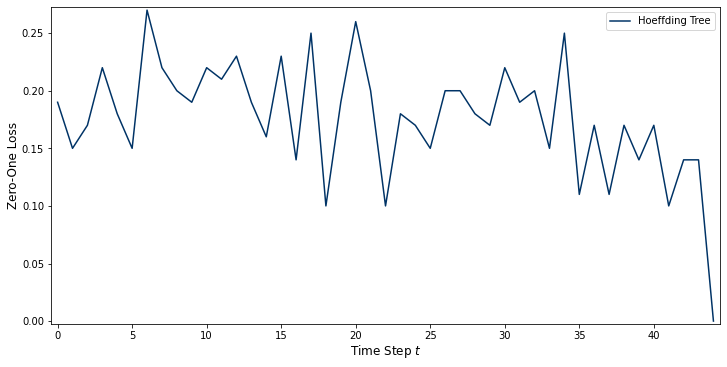

In [31]:
plot(measures=[pred_evaluator.result['zero_one_loss']['measures']],
     labels=['Hoeffding Tree'],
     measure_name='Zero-One Loss',
     measure_type='prediction',
     smooth_curve=[False])
plt.show()